<a href="https://colab.research.google.com/github/Hasta-8/Deep-Learning/blob/main/GitHub_VGG16_vs_MyCNN_with_CIFAR10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Goal: Comparing Custom CNN with VGG16 on CIFAR10

This project aims to explore the performance of a custom-built Convolutional Neural Network (CNN) against the well-established VGG16 architecture for image classification on the CIFAR10 dataset.

**Objectives:**

1.  Design and implement a custom CNN model.
2.  Train the custom CNN on the CIFAR10 dataset.
3.  Utilize the pre-trained VGG16 model (excluding the top classification layer) and add custom layers for classification on CIFAR10.
4.  Train the modified VGG16 model on the CIFAR10 dataset.
5.  Compare the performance of the custom CNN and the VGG16-based model based on metrics such as accuracy, loss, and training time.
6.  Analyze the results and draw conclusions about the effectiveness of each model for this task.

## CIFAR10 Dataset

The CIFAR10 dataset consists of 60,000 32x32 color images in 10 different classes. There are 6,000 images of each class.

*   **Number of images:** 60,000
*   **Image size:** 32x32 pixels
*   **Image type:** Color (3 channels: Red, Green, Blue)
*   **Number of classes:** 10
*   **Number of images per class:** 6,000
*   **Training dataset size:** 50,000 images
*   **Test dataset size:** 10,000 images

The 10 classes in the CIFAR10 dataset are:

1.  airplane
2.  automobile
3.  bird
4.  cat
5.  deer
6.  dog
7.  frog
8.  horse
9.  ship
10. truck

# CODE

## Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow

In [ ]:
# Import the cifar10 dataset from keras
from tensorflow.keras.datasets import cifar10

In [ ]:

# Load the CIFAR10 dataset
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


## Visualization

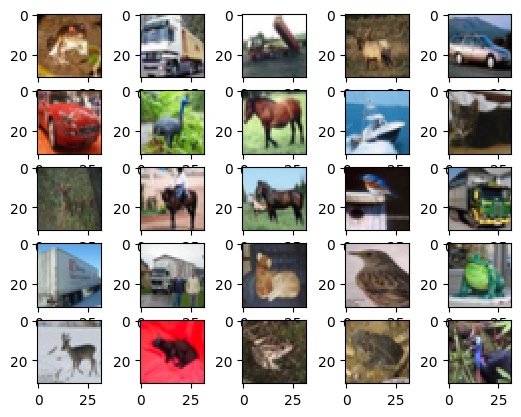

In [ ]:
# Display the first 25 images from the training set
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
plt.show()

In [ ]:
# Display the first 5 examples of y_train
print(y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


## Data Preprocessing

In [ ]:
# Reshape Data
X_train=X_train.reshape(50000,32,32,3)
X_test=X_test.reshape(10000,32,32,3)

In [ ]:
# Convert Data into 32byte - Necessary for numerical stability and compatibility with neural network computations.
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
# Normalizing or Min Max Scale Data - min pixel is 0 & max pixel is 255
X_train=X_train/255
X_test=X_test/255

In [ ]:
# Label Encode Dependent variable
y_train=tensorflow.keras.utils.to_categorical(y_train,10)
y_test=tensorflow.keras.utils.to_categorical(y_test,10)

## Model Building: My CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,BatchNormalization
from keras.layers import Flatten, Dense, Activation,Dropout

In [ ]:
cnn=Sequential()
# First convolutional block
cnn.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3),padding="same")) # Convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and same padding
cnn.add(BatchNormalization()) # Batch normalization layer
cnn.add(Conv2D(64,(3,3),activation="relu",padding="same")) # Convolutional layer with 64 filters, 3x3 kernel, ReLU activation, and same padding
cnn.add(BatchNormalization()) # Batch normalization layer
cnn.add(MaxPool2D(pool_size=(2,2))) # Max pooling layer with 2x2 pool size

# Second convolutional block
cnn.add(Conv2D(32,(3,3),activation="relu",padding="same")) # Convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and same padding
cnn.add(BatchNormalization()) # Batch normalization layer
cnn.add(Conv2D(64,(3,3),activation="relu",padding="same")) # Convolutional layer with 64 filters, 3x3 kernel, ReLU activation, and same padding
cnn.add(BatchNormalization()) # Batch normalization layer
cnn.add(MaxPool2D(pool_size=(2,2))) # Max pooling layer with 2x2 pool size

# Third convolutional block
cnn.add(Conv2D(128,(3,3),activation="relu",padding="same")) # Convolutional layer with 128 filters, 3x3 kernel, ReLU activation, and same padding
cnn.add(BatchNormalization()) # Batch normalization layer
cnn.add(Conv2D(64,(3,3),activation="relu",padding="same")) # Convolutional layer with 64 filters, 3x3 kernel, ReLU activation, and same padding
cnn.add(BatchNormalization()) # Batch normalization layer
cnn.add(MaxPool2D(pool_size=(2,2))) # Max pooling layer with 2x2 pool size

# Dense layers for classification
cnn.add(Flatten()) # Flatten layer
cnn.add(Dense(128,activation='relu')) # Dense layer with 128 units and ReLU activation
cnn.add(Dense(10,activation='softmax')) # Output dense layer with 10 units and softmax activation

# Compile the model
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Print the model summary
cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,026 (1.29 MB)

 Trainable params: 337,258 (1.29 MB)

 Non-trainable params: 768 (3.00 KB)

## Training My CNN

In [ ]:
cnnmodel=cnn.fit(X_train,y_train,epochs=20,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.4489 - loss: 1.5996 - val_accuracy: 0.2597 - val_loss: 2.5085
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6971 - loss: 0.8502 - val_accuracy: 0.6920 - val_loss: 0.9083
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7782 - loss: 0.6232 - val_accuracy: 0.7095 - val_loss: 0.8378
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8251 - loss: 0.5032 - val_accuracy: 0.7455 - val_loss: 0.7547
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8610 - loss: 0.4030 - val_accuracy: 0.7533 - val_loss: 0.7713
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8901 - loss: 0.3110 - val_accuracy: 0.7492 - val_loss: 0.8597
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9173 - loss: 0.2382 - val_accuracy: 0.7699 - val_loss: 0.7749
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9376 - loss: 0.1851 - val_

## CNN Evaluation

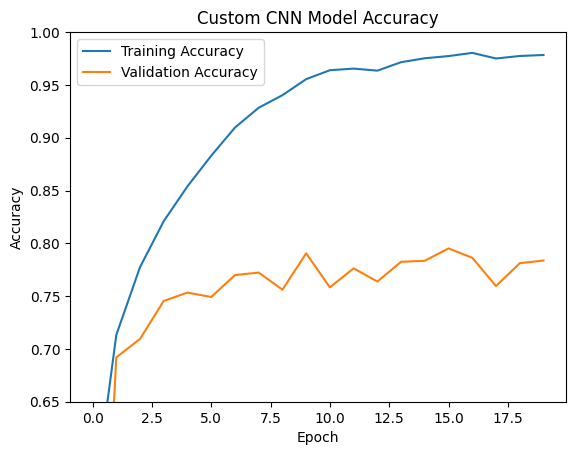

In [ ]:
# Plot training and validation accuracy
plt.plot(cnnmodel.history['accuracy'], label='Training Accuracy')
plt.plot(cnnmodel.history['val_accuracy'], label='Validation Accuracy')

# Add title and labels
plt.title('Custom CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Set y-axis limits
plt.ylim(0.65,1)

# Add legend
plt.legend()

# Show the plot
plt.show()

# Model is Overfitting as there is significant difference in Train and Test Accuracy
# Train is around 0.95 and Test is around 0.78

## Loading VGG16

In [ ]:
# Variants of CNN Models developed by Google researchers
# 1) VGGNet 2) ResNet50 3) Alexnet 4)Inceptionnet 5)Imagenet

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vgg16_model=VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3),classes=10)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## Making VGG16 suitable to this scenario

In [ ]:
model=Sequential()
# Add VGG16 layers (excluding the top classification layer)
for layer in vgg16_model.layers:
  model.add(layer)

# Add custom classification layers for CIFAR10
model.add(Flatten()) # Flatten the output of the convolutional layers
model.add(Dense(512,activation="relu")) # Dense layer with 512 units and ReLU activation
model.add(Dropout(0.40)) # Dropout layer to prevent overfitting
model.add(Dense(256,activation="relu")) # Dense layer with 256 units and ReLU activation
model.add(Dropout(0.40)) # Dropout layer to prevent overfitting
model.add(Dense(10,activation="softmax")) # Output dense layer with 10 units and softmax activation

# Compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 15,111,242 (57.64 MB)

 Non-trainable params: 0 (0.00 B)

## Training VGG16 model

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [ ]:
model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
vggmodel=model.fit(X_train,y_train,epochs=20,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 94ms/step - accuracy: 0.3489 - loss: 1.7935 - val_accuracy: 0.6921 - val_loss: 0.8882
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.7098 - loss: 0.8720 - val_accuracy: 0.7447 - val_loss: 0.7552
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.7703 - loss: 0.6901 - val_accuracy: 0.7870 - val_loss: 0.6198
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.8155 - loss: 0.5620 - val_accuracy: 0.8179 - val_loss: 0.5465
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.8376 - loss: 0.4914 - val_accuracy: 0.8245 - val_loss: 0.5247
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.8554 - loss: 0.4381 - val_accuracy: 0.8315 - val_loss: 0.5135
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.8772 - loss: 0.3728 - val_accuracy: 0.8341 - val_loss: 0.4960
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.8906 - loss: 0.3288 - 

## Evaluating VGG16 model

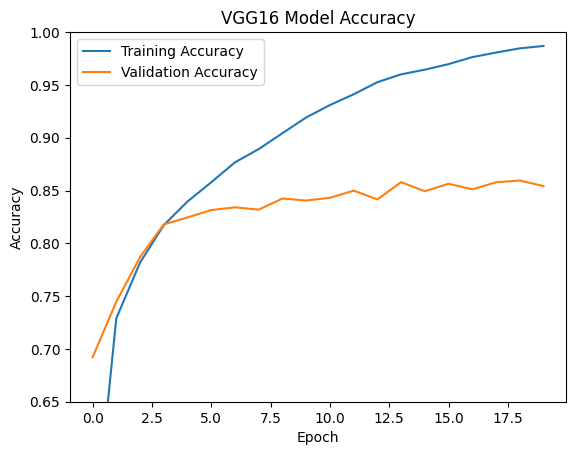

In [ ]:
# Plot training and validation accuracy
plt.plot(vggmodel.history['accuracy'], label='Training Accuracy')
plt.plot(vggmodel.history['val_accuracy'], label='Validation Accuracy')

# Add title and labels
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Set y-axis limits
plt.ylim(0.65,1)

# Add legend
plt.legend()

# Show the plot
plt.show()

# Model is Overfitting as there is significant difference in Train and Test Accuracy# Train is around 0.98 and Test is around 0.85

## Notebook Summary

This notebook focuses on comparing the performance of a custom Convolutional Neural Network (CNN) with a transfer-learned VGG16 model for image classification on the CIFAR10 dataset.

### Project Goal

The primary objective is to evaluate and compare a custom CNN against the VGG16 architecture on the CIFAR10 dataset.

### Dataset

*   **Number of images:** 60,000
*   **Image size:** 32x32 color images
*   **Number of classes:** 10 (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
*   **Training dataset size:** 50,000 images
*   **Test dataset size:** 10,000 images

### What was done

*   Data Loading and Visualization
*   Data Preprocessing (Reshaping, Type Conversion, Normalization, Label Encoding)
*   Model Building: Custom CNN
*   Training and Evaluation of Custom CNN
*   Loading VGG16
*   Making VGG16 suitable for CIFAR10
*   Training and Evaluation of VGG16 model

### Techniques Used

*   Custom Convolutional Neural Network (CNN)
*   Transfer Learning with VGG16
*   Data Preprocessing (Reshaping, Type Conversion, Normalization, Label Encoding)
*   Model Training and Evaluation

### Conclusion

*   Compare the performance of the custom CNN and the VGG16-based model based on metrics such as accuracy, loss, and training time.
*   Analyze the results and draw conclusions about the effectiveness of each model for this task.